# ท่าไม้ตายอาจารย์ ปิง

เอกสารประกอบ<br>
1.https://www.facebook.com/prakitsiriwattanaket <br>
2.https://www.facebook.com/watch/live/?ref=watch_permalink&v=550622759617709

นาที36

In [110]:
class HistStockPrice():
  def __init__(self):    
     self.tv = TvDatafeed()
    
  def days_between(self,d1, d2):
      d1 = dt.strptime(d1, "%Y-%m-%d")
      d2 = dt.strptime(d2, "%Y-%m-%d")
      return abs((d2 - d1).days)

  def getPrice(self,symbol,start,stop='',exchange='set'):
    
      date_now = dt.today().strftime("%Y-%m-%d") 
    
      if(stop==''):
        stop = date_now
    
      k = self.days_between(start, date_now)
    
      df = self.tv.get_hist(symbol=symbol,exchange=exchange,interval=Interval.in_daily,n_bars=k)
    
      df['Date'] = pd.to_datetime(df.index)
      df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
      df['Date'] = pd.to_datetime(df['Date'])

      df = df[['Date','close']]
      df = df.set_index('Date')
      df.columns = [symbol]
    
      df = df[(df.index>=start) & (df.index<=stop)]
      return df


In [111]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
import starfishX as sx
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import mplcyberpunk

from datetime import datetime as dt
plt.style.use("cyberpunk")

In [121]:
#### ดึงสมาชิกในของ SET50
memberS50 = sx.getMemberOfIndex(sx.indexMarket.SET50)

In [122]:
for i in memberS50['symbol']:
    print(i,end=' ')

ADVANC AOT AWC BANPU BBL BDMS BEM BGRIM BH BTS CBG COM7 CPALL CPF CPN CRC DTAC EA EGCO GLOBAL GPSC GULF HMPRO INTUCH IRPC IVL KBANK KCE KTB KTC LH MINT MTC OR OSP PTT PTTEP PTTGC RATCH SAWAD SCB SCC SCGP STGT TIDLOR TISCO TOP TRUE TTB TU 

# ทดสอบกับค่าเฉลี่ย 20 วัน

In [123]:
_TestDay_ = 20
objGetData = HistStockPrice()

In [124]:
df = objGetData.getPrice(symbol='ADVANC',start='2022-01-01',stop='2022-04-01')
df['SMA'] = df.rolling(window=_TestDay_).mean()
k = df.tail(1)
result = k['ADVANC']>k['SMA']
if(result.values[0]):
  print('count')

count


In [125]:
beforeDate = '2021-06-01' #1ตุลาคม
startDate = '2022-01-01'
endDate = '2022-04-01'

basket = memberS50['symbol']
start = 0
report = pd.DataFrame()
for i in basket:
   df = objGetData.getPrice(symbol=i,start=beforeDate,stop=endDate)
   df['SMA'] = df.rolling(window=_TestDay_).mean()
   report[i+'aboveSMA'] = np.where(df[i]>df['SMA'],1,0)
   print(i,end=',') #view progress
report

ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BTS,CBG,COM7,CPALL,CPF,CPN,CRC,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KCE,KTB,KTC,LH,MINT,MTC,OR,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,SCGP,STGT,TIDLOR,TISCO,TOP,TRUE,TTB,TU,

ADVANCaboveSMA  AOTaboveSMA  AWCaboveSMA  BANPUaboveSMA  BBLaboveSMA  \
0                 0            0            0              0            0   
1                 0            0            0              0            0   
2                 0            0            0              0            0   
3                 0            0            0              0            0   
4                 0            0            0              0            0   
..              ...          ...          ...            ...          ...   
202               0            1            1              0            1   
203               1            1            1              1            1   
204               1            1            1              0            1   
205               1            1            1              0            1   
206               1            1            1              0            1   

     BDMSaboveSMA  BEMaboveSMA  BGRIMaboveSMA  BHaboveSMA  BTSaboveSMA  ...  \
0               0            0              0           0            0  ...   
1               0            0              0           0            0  ...   
2               0            0              0           0            0  ...   
3               0            0              0           0            0  ...   
4               0            0              0           0            0  ...   
..            ...          ...            ...         ...          ...  ...   
202             1            0              1           0            0  ...   
203             1            0              1           0            0  ...   
204             0            0              1           0            0  ...   
205             0            1              1           0            1  ...   
206             0            0              1           0            0  ...   

     SCBaboveSMA  SCCaboveSMA  SCGPaboveSMA  STGTaboveSMA  TIDLORaboveSMA  \
0              0            0             0             0               0   
1              0            0             0             0               0   
2              0            0             0             0               0   
3              0            0             0             0               0   
4              0            0             0             0               0   
..           ...          ...           ...           ...             ...   
202            0            0             0             1               0   
203            0            0             1             1               0   
204            0            1             1             1               0   
205            0            1             1             1               0   
206            1            1             1             1               0   

     TISCOaboveSMA  TOPaboveSMA  TRUEaboveSMA  TTBaboveSMA  TUaboveSMA  
0                0            0             0            0           0  
1                0            0             0            0           0  
2                0            0             0            0           0  
3                0            0             0            0           0  
4                0            0             0            0           0  
..             ...          ...           ...          ...         ...  
202              1            1             1            0           1  
203              1            1             1            0           0  
204              1            1             1            0           1  
205              1            0             1            1           0  
206              1            0             1            1           1  

[207 rows x 50 columns]

<AxesSubplot:>

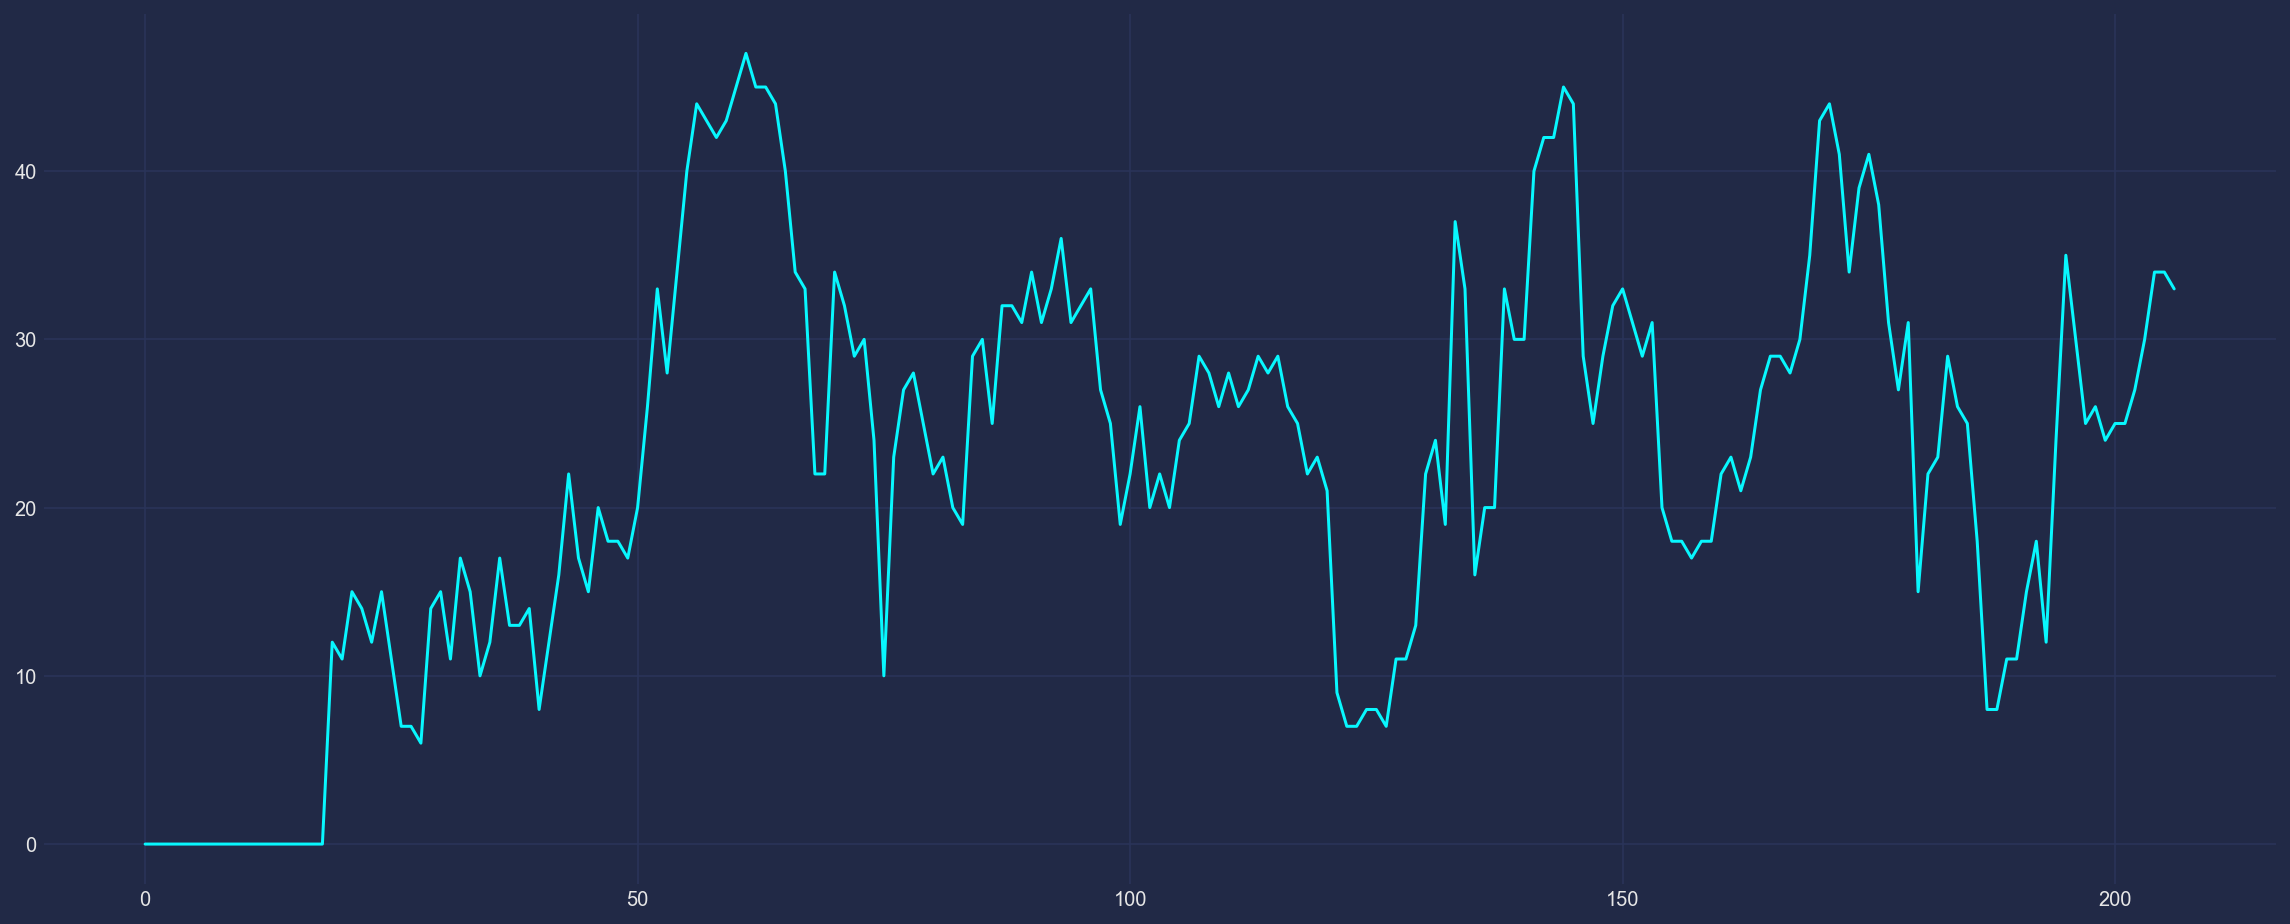

In [126]:
report.sum(axis=1).plot()

In [128]:
set50Index = objGetData.getPrice(symbol='set50',start=beforeDate,stop=endDate)

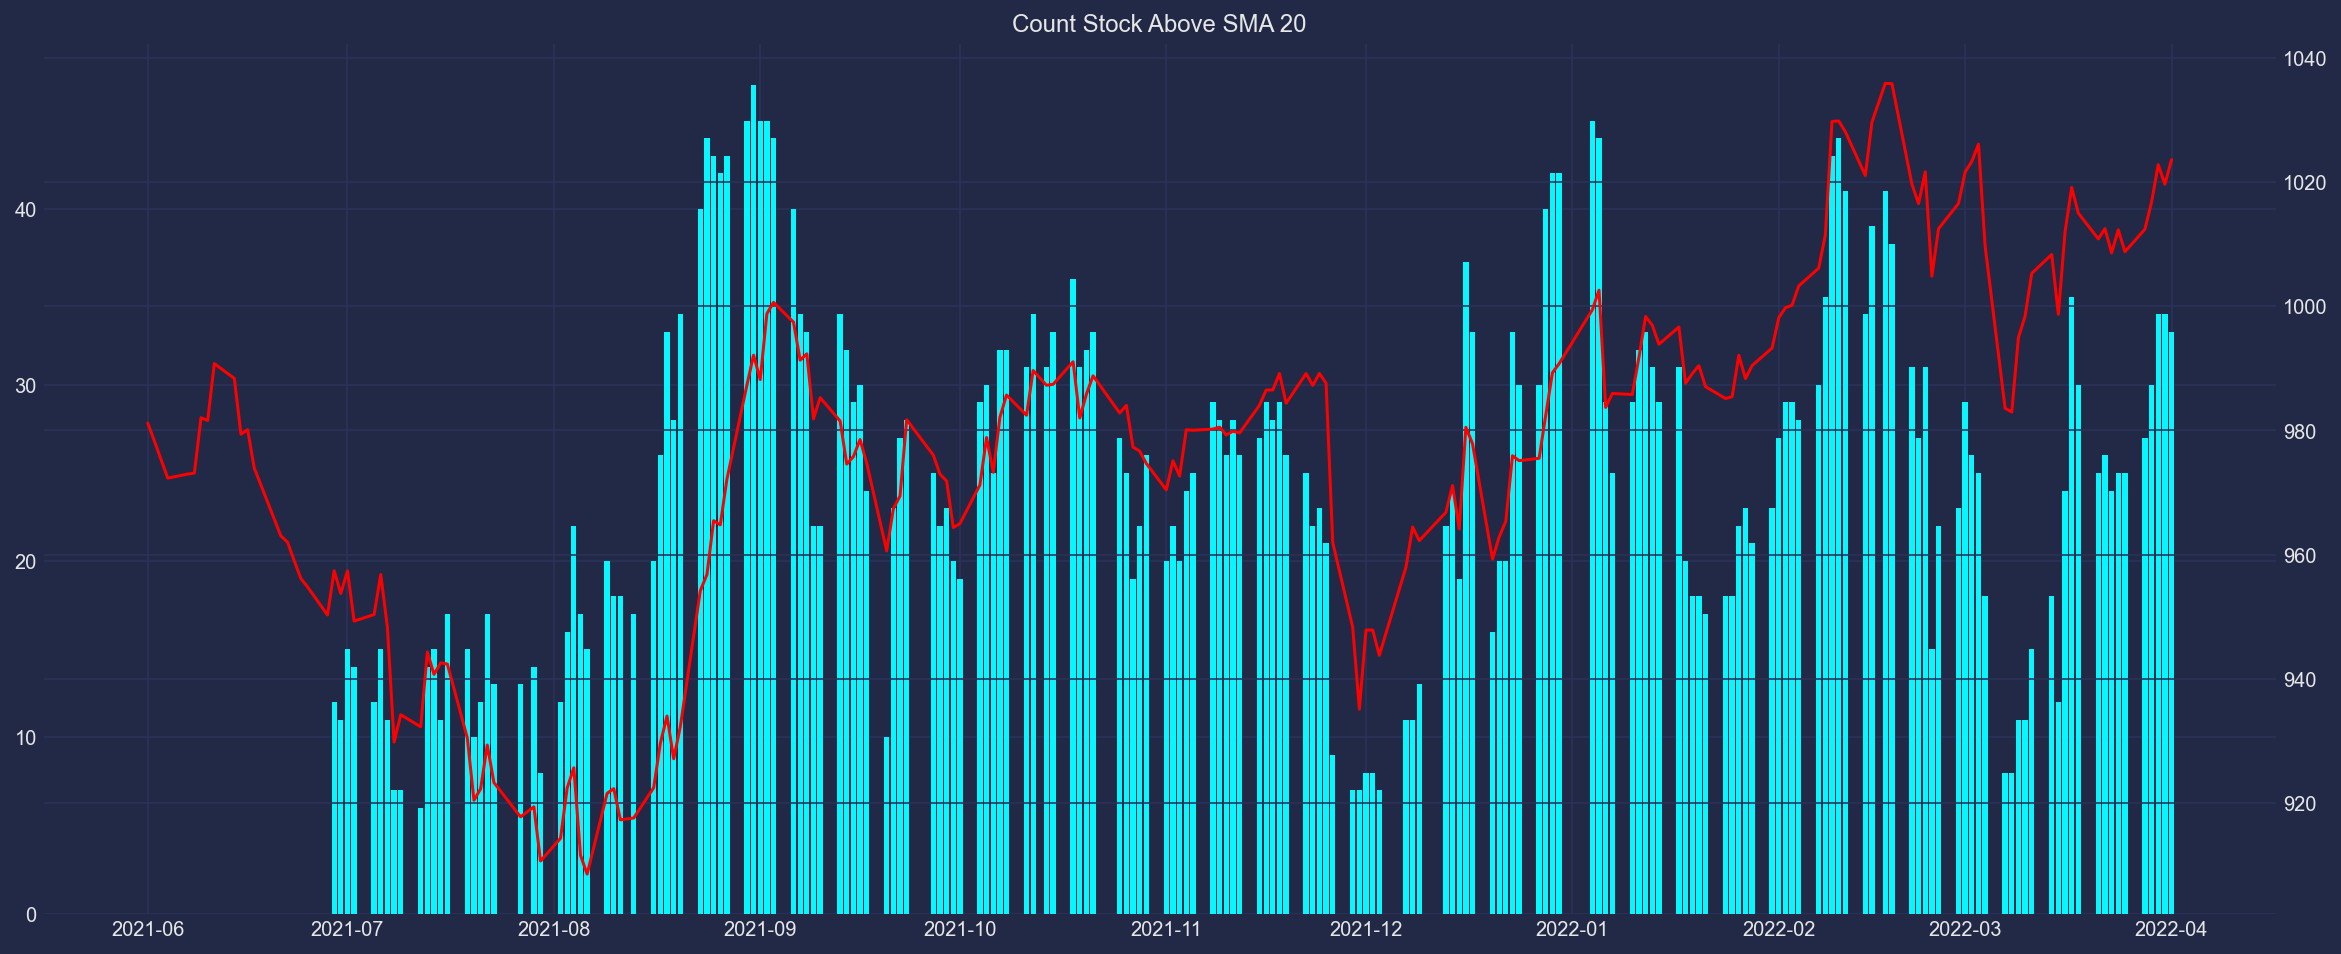

In [130]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,8)

ax2 = ax.twinx()

report['date'] = df.index
report = report.set_index('date')

k = report.sum(axis=1)
ax.bar(report.index,k)
ax2.plot(set50Index.index,set50Index,color='red')
plt.title('Count Stock Above SMA 20')
plt.show()

เอกสารประกอบ

![title](img/lab16.png)